# Progect 1: Introduction to Digital Signals
In this project we play with some properties of the convolution of impulses.

## Objective
1. We create a function that generates a periodic square wave of length 100.
2. Next, we create two signals (A) a vector of length 30 representing an impulse at 0 (B) a square wave using the function we created earlier.

    <code> delta1 = [1 zeros(1,29)];</code>
    
    <code> square = period(A,T,M,L);</code>

3. Convolute the two functions and diplay a stem plot.
4. Examine the convolution of two additional signals (A) a vector of length 30 representing an impulse at 0 and 29 (B) a square wave using the function we created earlier.
5. What is the relationship between these two?
6. Create an impulse response normalized by the response length and convolve this with the function we created earlier.

    <code> normalized = 1/3*[ones(1,3)];</code>
    
7. Increase the length of the impulse response to 6 and 12 (normalized by the length) and redo the convolution.
8. What happens as a result?

## Solutions

1. First, we create a local function that generates a periodic square wave of length $L$, amplitude $A$, lasts a total of $M$ samples, followed by $T-M$ samples that are zero such that the overall period is $T$.

In [3]:
function period(A,T,M,L)
    mag = A*ones(Float32, (1,M))
    zero = zeros(Float32, (1,T-M))

    sqr = hcat(mag, zero)
    sqr_cat = sqr
    counter = 1
    while counter < round(L/T)
        sqr = hcat(sqr,sqr_cat)
        counter = counter+1
    end
    return sqr'
end

period (generic function with 1 method)

Calling and printing the function yields an array fullfilling the required parameters.

In [4]:
sqr = Array(period(4, 10, 6, 100))
println(sqr)
println(length(sqr))

Float32[4.0; 4.0; 4.0; 4.0; 4.0; 4.0; 0.0; 0.0; 0.0; 0.0; 4.0; 4.0; 4.0; 4.0; 4.0; 4.0; 0.0; 0.0; 0.0; 0.0; 4.0; 4.0; 4.0; 4.0; 4.0; 4.0; 0.0; 0.0; 0.0; 0.0; 4.0; 4.0; 4.0; 4.0; 4.0; 4.0; 0.0; 0.0; 0.0; 0.0; 4.0; 4.0; 4.0; 4.0; 4.0; 4.0; 0.0; 0.0; 0.0; 0.0; 4.0; 4.0; 4.0; 4.0; 4.0; 4.0; 0.0; 0.0; 0.0; 0.0; 4.0; 4.0; 4.0; 4.0; 4.0; 4.0; 0.0; 0.0; 0.0; 0.0; 4.0; 4.0; 4.0; 4.0; 4.0; 4.0; 0.0; 0.0; 0.0; 0.0; 4.0; 4.0; 4.0; 4.0; 4.0; 4.0; 0.0; 0.0; 0.0; 0.0; 4.0; 4.0; 4.0; 4.0; 4.0; 4.0; 0.0; 0.0; 0.0; 0.0;;]


100


We can plot the function as a Stem plot to varify its behavior. (Ensure Plots is installed via <code>using Pkg; Pkg.add("Plots")</code>)

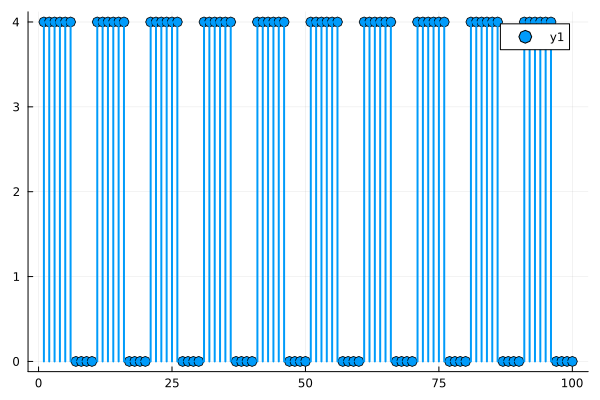

In [5]:
using Plots
plot(sqr, line=:stem, marker=:o, markersize=5, linewidth=2)

2. Now we create the impulse

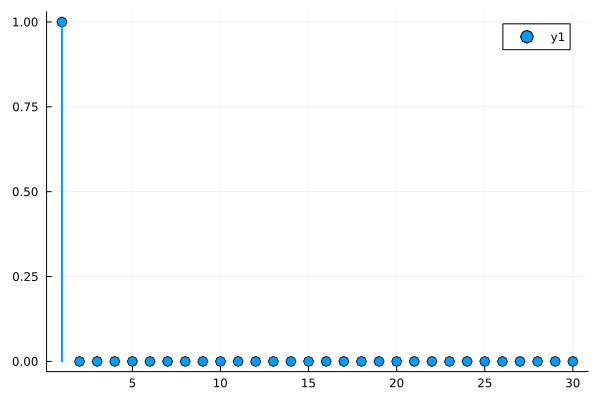

In [13]:
delta1 = Array(vcat(Array([1]), zeros(29)))
plot(delta1, line=:stem, marker=:o, markersize=5, linewidth=2)

3. Now we convolve the two signals (Ensure DSP is installed via <code>using Pkg; Pkg.add("DSP")</code>)

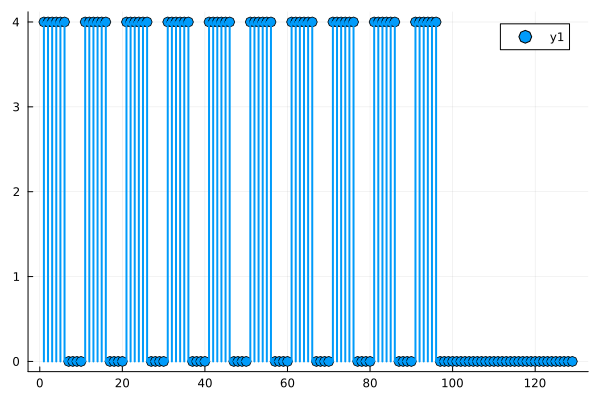

In [14]:
using DSP

conv1 = conv(sqr, delta1)
plot(conv1, lines=:stem, marker=:o, markersize=5, linewidth=2)

4. Now we ammend the impulse to have an additional signal at the end.

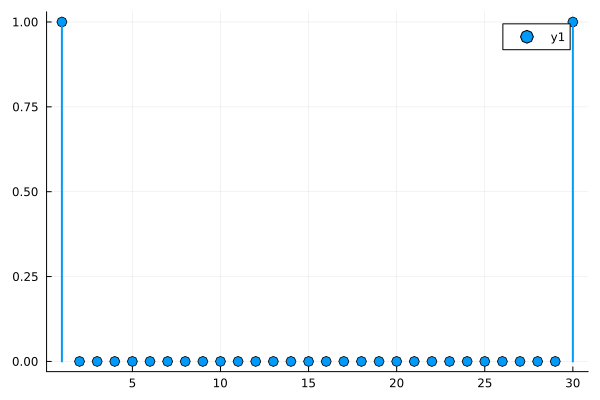

In [15]:
delta1[30] = 1
delta2 = delta1
plot(delta2, lines=:stem, marker=:o, markersize=5, linewidth=2)

We follow by convolving the square function with this impulse.

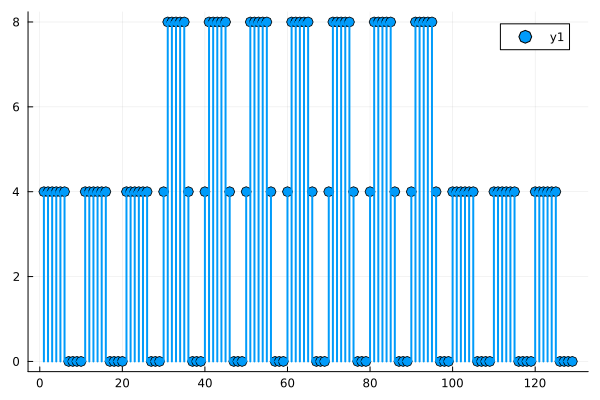

In [16]:
conv2 = conv(sqr, delta2)
plot(conv2, lines=:stem, marker=:o, markersize=5, linewidth=2)

5. The relationship between the two different convolutions is that for any two arrays of size $N$ and $M$ the total length of the convoluted array is $N + M − 1$.

6. We create the normalized signal

In [10]:
normalized = 1/3*ones(3)

3-element Vector{Float64}:
 0.3333333333333333
 0.3333333333333333
 0.3333333333333333

and convolve with the function we created at the beginning.

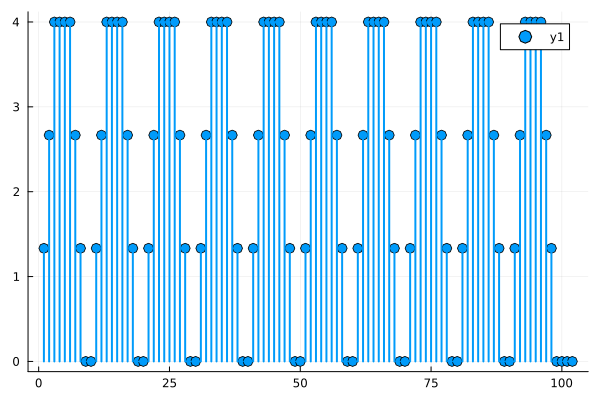

In [17]:
conv3 = conv(sqr, normalized)
plot(conv3, lines=:stem, marker=:o, markersize=5, linewidth=2)

7. Now we increase the length to 6 and 12 before doing the same operation

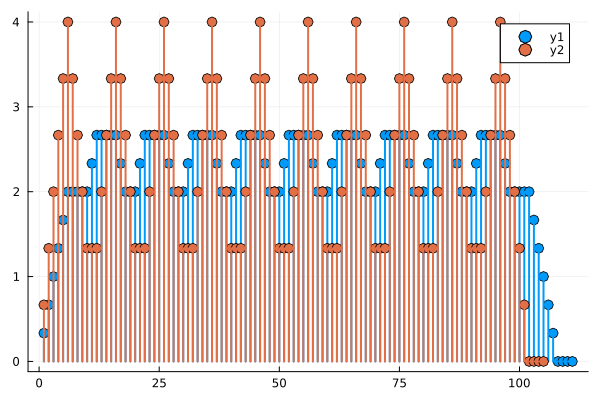

In [18]:
normalized2 = 1/6*ones(6)
normalized3 = 1/12*ones(12)
conv4 = conv(sqr, normalized2)
conv5 = conv(sqr, normalized3)
plot([conv5,conv4], lines=:stem, marker=:o, markersize=5, linewidth=2)

8. The result of normalization is a moving average that smooths the step function. Changing the length and normalization affects the smoothness of the average as it rolls across the square wave.